In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


(50000, 32, 32, 3)

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [7]:
'''def figure(X, y, num):
  plt.figure(figsize = (15,2)) #Adjust the image size
  plt.imshow(X[num])
  plt.xlabel(classes[y[num]])
  plt.axis('off')  '''

"def figure(X, y, num):\n  plt.figure(figsize = (15,2)) #Adjust the image size\n  plt.imshow(X[num]) \n  plt.xlabel(classes[y[num]])  \n  plt.axis('off')  "

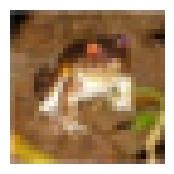

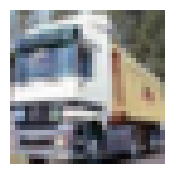

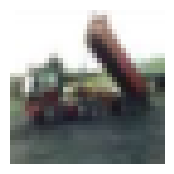

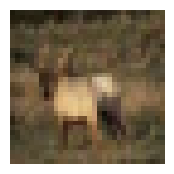

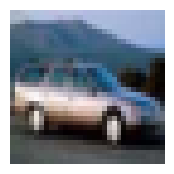

In [8]:
for i in range(5):
  plt.figure(figsize = (15,2)) #Adjust the image size
  plt.imshow(X_train[i])
  plt.xlabel(classes[y_train[i]])
  plt.axis('off')

  plt.show()  #Show images

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
'''ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation ='relu'),
    layers.Dense(1000, activation ='relu'),
    layers.Dense(10, activation='sigmoid')

  ])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])  # Correct spelling
ann.fit(X_train, y_train, epochs=5) ''''

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

ANN is not working well. We need to use CNN model


In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')


])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=75)

Epoch 1/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7300 - loss: 0.7729
Epoch 2/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7489 - loss: 0.7234
Epoch 3/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7648 - loss: 0.6724
Epoch 4/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7789 - loss: 0.6350
Epoch 5/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7893 - loss: 0.5976
Epoch 6/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8025 - loss: 0.5612
Epoch 7/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8143 - loss: 0.5276
Epoch 8/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8265 - loss: 0.4979
Epoch 9/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8369 - loss: 0.4650
Epoch 10/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8479 - loss: 0.4345
Epoch 11/75
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8556 - loss: 0.4090
Epoch 12/75
1563/1563 ━━━━━━━━

In [24]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6676 - loss: 4.0857


[4.201061725616455, 0.6635000109672546]

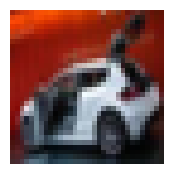

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: automobile
Actual Class: automobile


In [37]:
# Select an index to test a single image (e.g., index 0)
index = 6

# Display the image
plt.figure(figsize = (2,2))
plt.imshow(X_test[index])

plt.axis('off')  # Turn of axis
plt.show()

# Predict the class of the selected image
prediction = cnn.predict(X_test[index].reshape(1, 32, 32, 3))  # Reshape for batch dimension
predicted_class = np.argmax(prediction)  # Get the index of the highest probability

# Display the predicted and actual class
print(f"Predicted Class: {classes[predicted_class]}")
print(f"Actual Class: {classes[y_test[index][0]]}")